In [8]:
library("survival")
library("survminer")
library(rms)
options(repr.plot.width = 5, repr.plot.height = 5)

In [9]:
df = read.csv("mechanistic/data_and_parameters.csv")

In [10]:
head(df)

id,age,date_de_naissance,sex,date_diagnostic,localisation_masse_initiale,precision_localisation,LDH,Nmyc,precision_NMyc,⋯,mu,visible_threshold,X..log..mu..,MYCN,visible.threshold,tumor.size,log.mu.,log.LDH.,X..log.LDH..,score
<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45,2004-02-14,1,2007-11-26,surrénal,surrénal D,1183,0,non,⋯,0.0003032141,3.356473,-8.1010716,0,3.356473,1142.85905,-8.1010716,7.075809,7.075809,8.709002
2,50,2004-04-28,0,2008-07-11,surrénal,surrénal D,3300,1,oui,⋯,0.0364052624,15.472636,-3.3130419,1,15.472636,824.66807,-3.3130419,8.101678,8.101678,8.871726
3,54,2004-05-07,0,2008-11-10,surrénal,surrénal D,712,1,oui,⋯,0.0078444316,8.229744,-4.8479513,1,8.229744,434.39262,-4.8479513,6.568078,6.568078,7.591201
4,54,2004-11-03,1,2009-05-20,surrénal,surrénal G,1790,1,oui,⋯,0.0704382130,13.974080,-2.6530194,1,13.974080,272.91015,-2.6530194,7.489971,7.489971,8.126267
6,50,2005-06-03,0,2009-08-12,thoracique,médiastin,302,0,non,⋯,0.0118401607,6.792008,-4.4362581,0,6.792008,157.07963,-4.4362581,5.710427,5.710427,6.640784
8,24,2008-09-11,0,2010-09-13,surrénal,surrénal G,830,0,non,⋯,1.1617631466,12.573282,0.1499388,0,12.573282,10.26358,0.1499388,6.721426,6.721426,6.825579


# Mechanistic + clinical

In [11]:
res.cox = cph(Surv(OS, deces) ~ log.mu. + log.LDH. , data = df, surv=TRUE, x=TRUE, y=TRUE, time.inc=43)

In [12]:
res.cox

Cox Proportional Hazards Model
 
 cph(formula = Surv(OS, deces) ~ log.mu. + log.LDH., data = df, 
     x = TRUE, y = TRUE, surv = TRUE, time.inc = 43)
 
                     Model Tests       Discrimination    
                                          Indexes        
 Obs        45    LR chi2     12.85    R2       0.258    
 Events     23    d.f.            2    Dxy      0.504    
 Center 7.7804    Pr(> chi2) 0.0016    g        1.071    
                  Score chi2  13.05    gr       2.920    
                  Pr(> chi2) 0.0015                      
 
          Coef    S.E.   Wald Z Pr(>|Z|)
 log.mu.  -0.1845 0.0737 -2.50  0.0123  
 log.LDH.  1.0197 0.3168  3.22  0.0013  
 

Harrell's calibrate function from rms package (fancy bootstrapping)

Using Cox survival estimates at 43 Days


pdf 
  2

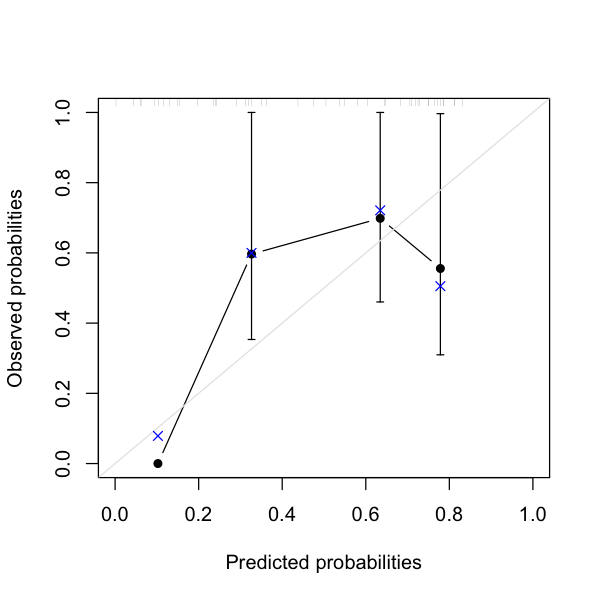

In [13]:
cal <- suppressWarnings(calibrate(res.cox, u=43, cmethod='KM', m=10)) # usually B=200 or 300
options(repr.plot.width = 5, repr.plot.height = 5)
pdf('mechanistic/cox_regression_mechanistic_clinical/os/calibration_plot_harrell.pdf')
par(cex=1.2)
plot(cal, xlim=c(0,1), ylim=c(0,1), subtitles=FALSE,
     xlab="Predicted probabilities",
     ylab="Observed probabilities")
dev.off()
plot(cal, xlim=c(0,1), ylim=c(0,1), subtitles=FALSE,
     xlab="Predicted probabilities",
     ylab="Observed probabilities")
# X marks the bootstrap corrected estimates. [Shen et al. International Journal of Oncology, 2014]

# Clinical

In [6]:
res.cox.clinical = cph(Surv(OS, deces) ~ log.LDH. + tumor.size, data = df, surv=TRUE, x=TRUE, y=TRUE, time.inc=43)

Using Cox survival estimates at 43 Days


pdf 
  2

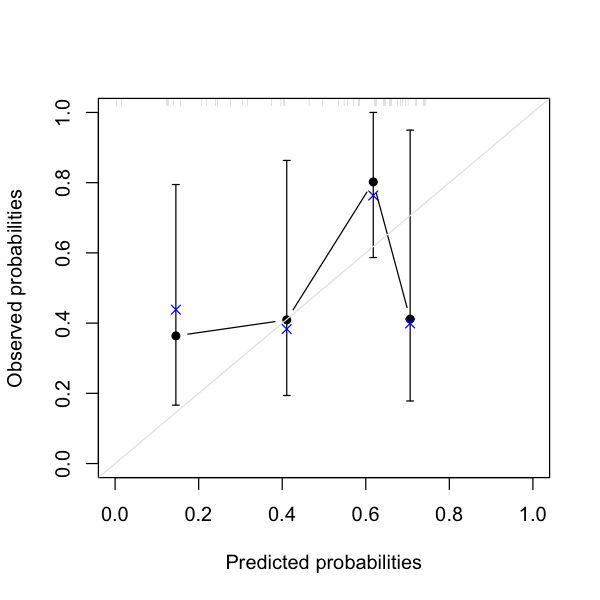

In [7]:
cal <- suppressWarnings(calibrate(res.cox.clinical, u=43, cmethod='KM', m=10)) # usually B=200 or 300
pdf('cox_regression/os/calibration_plot_harrell.pdf')
par(cex=1.2)
plot(cal, xlim=c(0,1), ylim=c(0,1), subtitles=FALSE,
     xlab="Predicted probabilities",
     ylab="Observed probabilities")
dev.off()
plot(cal, xlim=c(0,1), ylim=c(0,1), subtitles=FALSE,
     xlab="Predicted probabilities",
     ylab="Observed probabilities")